<img src="../../figs/holberton_logo.png" alt="logo" width="500"/>

# Fashion MNIST Neural Network 

## Executive Summary

The Fashion MNIST dataset is a benchmark dataset widely used for image classification tasks. The dataset consists of `70,000` grayscale images of `28x28` pixels, each belonging to one of `10` categories, such as T-shirts, pants, shoes, and dresses. The goal is to train a model that can correctly classify these images.

While building a simple feedforward neural network for this task is straightforward, achieving high accuracy on this dataset can be challenging. One of the main challenges is preventing overfitting, where the model becomes too specialized to the training data and performs poorly on new data. 

Another challenge is finding the right set of hyperparameters and optimization algorithm to train the model effectively. We will explore several optimization techniques, such as stochastic gradient descent (SGD) and Adam, and experiment with different learning rates and batch sizes to find the optimal combination

## Setting up: import the necessary libraries

First, we import the necessary libraries for building and training neural networks, including TensorFlow and Keras. Then, we specifically import the `fashion_mnist` dataset from the Keras datasets module. In particular


- import tensorflow as tf
- from tensorflow import keras
- from keras datasets import `fashion_mnist`


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

## Setting up: load the `fashion_mnist` dataset

The Fashion MNIST dataset contains `70,000` grayscale images of `28x28` pixels. Load the dataset into training and testing data. You may call the variables `x_train_full, y_train_full, x_test, y_test` 

- There are `60,000` images in the training set and `10,000` images in the test set. 
- The `x_train_full` and `x_test` variables have shapes of `(60000, 28, 28)` and `(10000, 28, 28)` respectively, indicating that there are 60,000 training images and 10,000 test images, each of which is 28x28 pixels. 
- The `y_train_full` and `y_test` variables have shapes of `(60000,)` and `(10000,)`, respectively.



In [2]:
# Load the Fashion MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print("Training set shape:", x_train_full.shape)
print("Test set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


## Preprocess the data

Each image data is stored as a two-dimensional array of pixel values ranging from 0 to 255, representing the intensity of light at each pixel. 

**Normalizing the data ensures that all input values are within the same scale, which helps the neural network converge faster during training.** 

Normalizing by dividing with 255 scales the pixel values from 0 to 255 to a range between 0 and 1, ensuring uniformity across the dataset. This process maintains the relative relationships between pixel intensities while facilitating faster convergence during model training.


In [3]:
# Normalize the data
x_train_full = x_train_full / 255.0
x_test       = x_test / 255.0

## Add validation set data

The validation set is crucial for **evaluating the model's performance on unseen data and preventing overfitting**. By splitting the training set into training and validation sets, we reserve a portion of the data for validation, ensuring that the model's performance generalizes well.

In [4]:
x_train, x_valid = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

print("Training set shape:", x_train.shape)
print("Validation set shape:", x_valid.shape)
print("Test set shape:", x_test.shape)

Training set shape: (55000, 28, 28)
Validation set shape: (5000, 28, 28)
Test set shape: (10000, 28, 28)


## Visualizing the dataset

The Fashion MNIST dataset contains `10` classes, each corresponding to a different article of clothing:

| Label | Class       |
|:-------:|:-------------:|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |



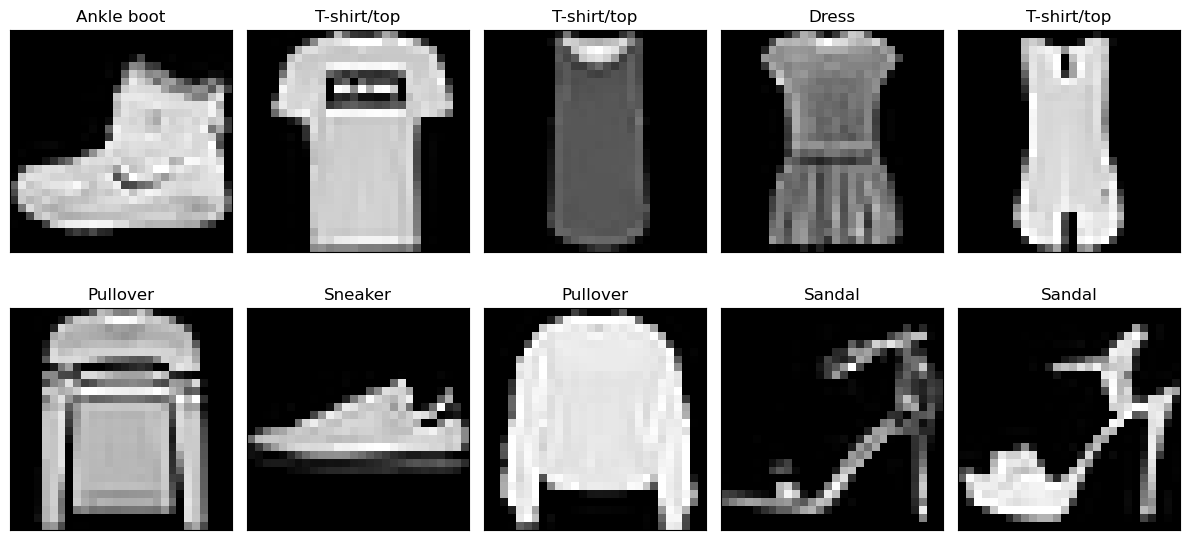

In [5]:
import matplotlib.pyplot as plt

# Define category names
category_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a sample of the training data
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []}) # remove the tick marks on both the x-axis and y-axis

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(category_names[y_train[i]])
    
plt.tight_layout()
plt.show()

## Building the Feed-Forward Artificial Neural Network

### Neural Network Pipeline

<img src="../img/pipeline.png" alt="logo" width="1000"/>


### Architecture of the Neural Network

The **architecture of a feedforward neural network typically consists of an input layer, one or more hidden layers, and an output layer**. 


- The input layer should have the same number of nodes as the number of input features in the data

- The output layer should have the same number of nodes as the number of classes in the data. 


- The number of hidden layers and the number of nodes in each hidden layer can be adjusted based on the complexity of the problem and the size of the dataset



### Activation Functions

Activation functions are used to introduce nonlinearity into the neural network, allowing it to learn more complex patterns in the data. Common activation functions include `ReLU`, `sigmoid`, and `tanh`.

Let us build a simple architecture  comprising three layers:

- Input Layer (Flatten): Reshapes the input data from a 28x28 matrix to a flat vector of 784 elements.

- Hidden Layer (Dense): Consists of 128 neurons with a sigmoid activation function, which introduces non-linearity to the model and allows it to learn complex patterns in the data.

- Output Layer (Dense): Comprises 10 neurons representing the output classes (since we have 10 classes in the Fashion MNIST dataset) with a softmax activation function, which computes the probabilities of each class.

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

Compiling the model configures its learning process, defining crucial aspects such as the optimizer, loss function, and evaluation metrics.

The key parameters are:

- **optimizer**: Determines the optimization algorithm used during training, such as Adam, SGD (Stochastic Gradient Descent), etc.
- **loss**: Defines the objective function the model aims to minimize during training, such as cross-entropy for classification tasks.

- **metrics**: Specifies the metrics used to monitor the model's performance during training, such as accuracy.

In [7]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Train the model

Training is the process where a model learns from data by adjusting its internal parameters, aiming to minimize the difference between predicted and actual outcomes. Through techniques like gradient descent, the model gradually improves its ability to recognize patterns, enhancing its accuracy in making predictions on new data.

- **Defining Training Parameters**: Specify the number of epochs (iterations over the entire dataset) and the batch size (number of samples processed before updating the model).

- **Training the Model**: Use the fit method to train the model on the training data (`x_train` and `y_train`). Provide validation data (`x_valid` and `y_valid`) to monitor the model's performance during training.


- **Monitoring Performance**: During training, the model's performance metrics (such as loss and accuracy) on both the training and validation sets are recorded in the history object for analysis.

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 3s 6ms/step - loss: 1.8488 - accuracy: 0.5661 - val_loss: 1.4947 - val_accuracy: 0.7074
Epoch 2/10
430/430 [==============================] - 3s 7ms/step - loss: 1.3094 - accuracy: 0.7038 - val_loss: 1.1485 - val_accuracy: 0.7184
Epoch 3/10
430/430 [==============================] - 3s 6ms/step - loss: 1.0674 - accuracy: 0.7209 - val_loss: 0.9750 - val_accuracy: 0.7342
Epoch 4/10
430/430 [==============================] - 3s 6ms/step - loss: 0.9375 - accuracy: 0.7328 - val_loss: 0.8732 - val_accuracy: 0.7456
Epoch 5/10
430/430 [==============================] - 3s 7ms/step - loss: 0.8560 - accuracy: 0.7414 - val_loss: 0.8060 - val_accuracy: 0.7526
Epoch 6/10
430/430 [==============================] - 3s 6ms/step - loss: 0.8001 - accuracy: 0.7478 - val_loss: 0.7594 - val_accuracy: 0.7558
Epoch 7/10
430/430 [==============================] - 3s 7ms/step - loss: 0.7586 - accuracy: 0.7541 - val_loss: 0.7230 - val_accuracy: 0.7634
Epoch 

## Save the model

We can use the `pickle` module in Python to serialize your trained model and save it to a file. Here's how you can do it:

- After training the model (until we are satisfied with its performance)

- **Save the Model**: we can use `pickle` to save the trained model to a file. We can do this by serializing the model object and writing it to a file using the `dump()` function.

In [9]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


### Visualize accuracy and loss

Visualizing accuracy and loss during training provides insights into the model's performance and training dynamics:

- **Accuracy**: Plots of training and validation accuracy over epochs show how well the model is learning. Higher values indicate better performance. Discrepancies between training and validation curves may signal overfitting or underfitting.

- **Loss**: Plots of training and validation loss over epochs illustrate how well the model is minimizing errors. Lower values indicate better performance. Discrepancies between training and validation curves can indicate issues like overfitting or poor generalization.

By monitoring these metrics, we can diagnose model behavior, optimize hyperparameters, and determine whether further training or adjustments are necessary for better performance.

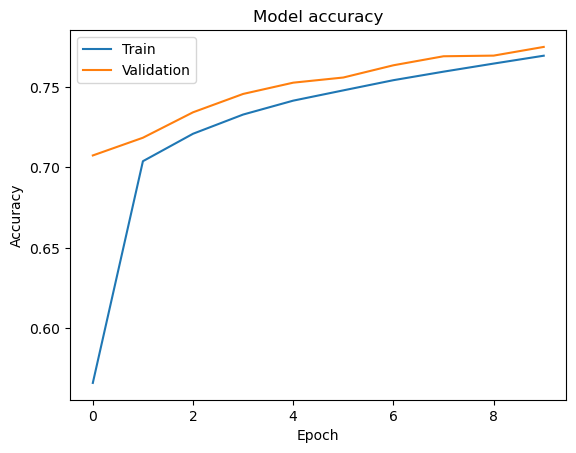

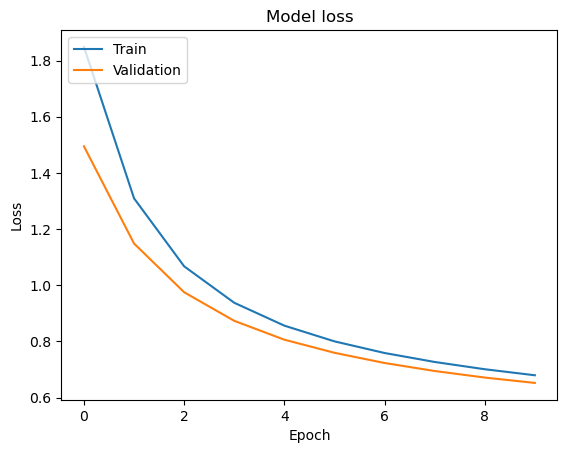

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Test accuracy


Measuring the accuracy of test data assesses how well the trained model generalizes to new, unseen data. It provides an objective evaluation of the model's performance on real-world scenarios, indicating its ability to make accurate predictions beyond the training set. 

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.6842 - accuracy: 0.7642
Test accuracy: 0.76419997215271


## Test with Loaded Model

If we've loaded the model using pickle, we can directly use the loaded model to make predictions on the test data.

In [12]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
    test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
    print('Test accuracy:', test_acc)




313/313 [==============================] - 2s 4ms/step - loss: 0.6842 - accuracy: 0.7642
Test accuracy: 0.76419997215271


### Visualize some test data

We can visualize a selection of images from the test set alongside their true and predicted labels, offering a qualitative assessment of the model's performance. By comparing the true labels (ground truth) with the predicted labels generated by the model, we gain insights into its accuracy and potential areas of improvement. 

313/313 [==============================] - 1s 3ms/step


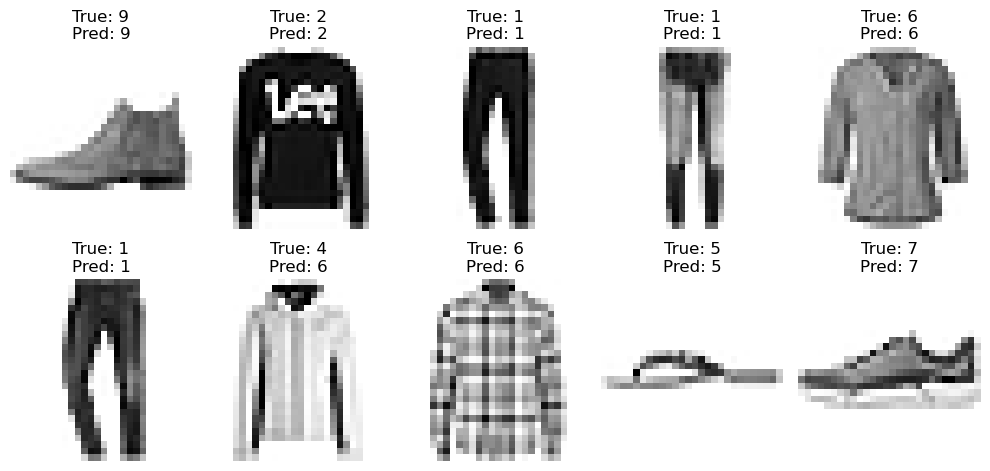

In [13]:
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = model.predict(x_test)

# Create a figure with 2 rows and 5 columns
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Plot images and their true/predicted labels
for i in range(2):
    for j in range(5):
        # Compute the index of the current image in the test set
        index = 5 * i + j
        
        # Plot the current image
        axs[i, j].imshow(x_test[index], cmap='binary')
        axs[i, j].axis('off')
        
        # Get the true label of the current image
        true_label = y_test[index]
        
        # Get the predicted label of the current image
        predicted_label = y_pred[index].argmax()
        
        # Add the true and predicted labels to the plot
        axs[i, j].set_title(f'True: {true_label}\nPred: {predicted_label}')
        
# Adjust spacing between subplots
fig.tight_layout()
plt.show()


## How can I improve my model?

#### Experiment with Model Architecture:

- Try adding more layers or neurons to the existing architecture to increase model complexity.
- Explore different activation functions, such as ReLU or tanh, to introduce non-linearity and capture more intricate patterns in the data.
- Experiment with different types of layers, such as dropout or batch normalization, to improve generalization and prevent overfitting.

##### Optimize Hyperparameters:
- Adjust the learning rate of the optimizer to control the size of the steps taken during gradient descent.
- Explore different optimization algorithms, such as Adam, SGD, or RMSprop, to find the one that works best for your dataset.
- Tune batch size, number of epochs, and other training parameters to achieve better convergence and prevent underfitting or overfitting.


### Happy Coding